# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## **Import Libraries and Data**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, f1_score, classification_report, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

In [2]:
learn_df = pd.read_csv('ExtraaLearn.csv')
learn_df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3]:
learn_df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [4]:
learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### **Check Missing Values**

In [5]:
learn_df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

#### **Check Duplicates**

In [6]:
learn_df.duplicated().sum()

0

- The dataset contains 4612 data points and 15 columns.
- The dataset contains 10 categorical features and 5 numerical features. 
- The dataset has no missing or duplicate values. 

## **Exploratory Data Analysis (EDA)**

In [7]:
learn_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The customer ID is a unique number that doesn't add anything to this study, so we can drop the ID column. 
- The average age of leads is 46, with a minimum age of 18 and a maximum age of 63. 
- More than half of the leads are professional. 
- 55% of leads' first interaction was through the website, and 45% was through the Mobile App. 
- On average, the lead visited the websites 3.5 times, with a minimum visit of 0 and a maximum visit of 30. Fifty percent of the customers visited the websites 2-5 times. 
- On average, leads spent 724 total time on the website, with the maximum time being 2537. 
- On average, leads visit three pages per visit. 
- 49% of the lead's last activity was email. 
- Only ~11% of the lead saw the ads in the newspaper. 
- Only 5% of the leads saw the ads in magazines. 
- Only 11.5% of the leads saw the ads on digital platforms. 
- 15% of the leads heard about ExtraaLearn on educational channels.
- Only 2% of the leads heard about EtraaLearn through referral. 

In [8]:
learn_df.drop('ID', axis=1, inplace=True)

#### **Univariate Analysis**

##### **Numerical Features**

In [9]:
num_features = learn_df.select_dtypes(include=['float', 'int']).columns.to_list()

def hist_box_plt(data, column):
    f, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex= True, figsize= (10,3), gridspec_kw={'height_ratios':(0.25,0.75)})
    sns.boxplot(data=data, x=column, ax=ax_box, showmeans=True, color='violet')
    sns.histplot(data=data, x=column, kde=True, ax=ax_hist )
    ax_hist.axvline(data[column].mean(), color='green', linestyle = '--')
    ax_hist.axvline(data[column].median(), color='black', linestyle = '-')
    plt.show()

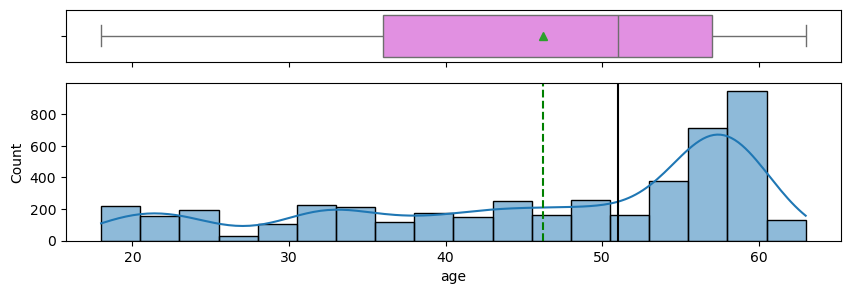

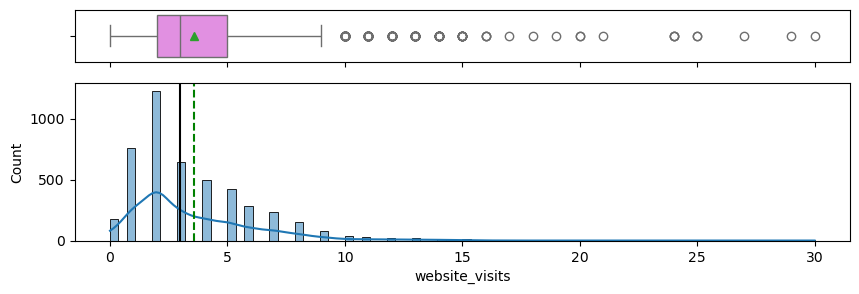

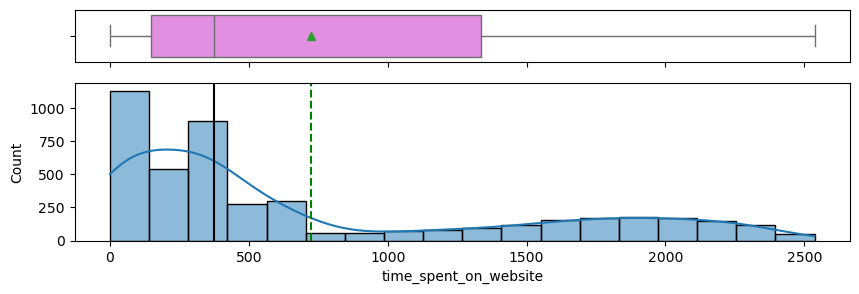

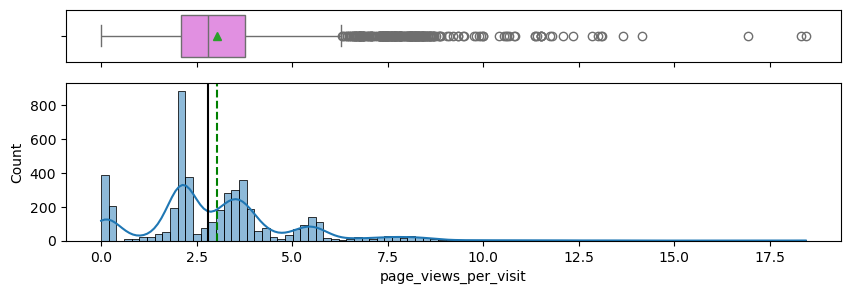

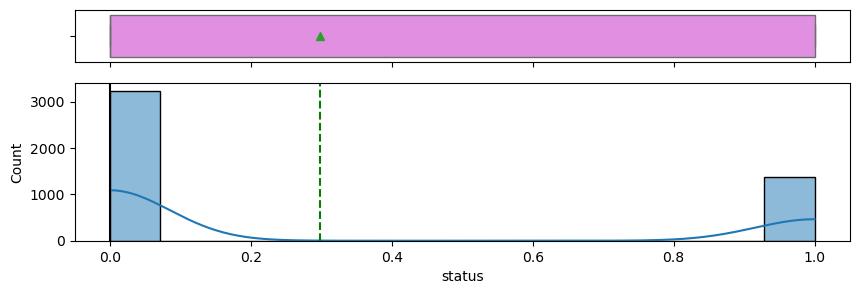

In [10]:
for column in num_features:
    hist_box_plt(learn_df, column)

- Age of leads is left-skewed distribution. 
- Website visits is a right-skewed distribution with many outliers due to the high number of visits. 
- Time spent on the website also has a right-skewed distribution. 
- The number of page views per visit is also a right-skewed multimodal distribution with many outliers. 

In [11]:
learn_df['status'].value_counts(1)

0    0.701431
1    0.298569
Name: status, dtype: float64

- The data is imbalanced regarding status; only 30% of leads converted to paid customers, while 70% use unpaid services. We should consider this when splitting the test and training data.

In [12]:
learn_df[learn_df['website_visits']==0].shape

(174, 14)

- ~4% of leads never visited the website. 

##### **Categorical Features**

In [13]:
cat_features= learn_df.select_dtypes(include='object').columns.to_list()
for col in cat_features[:6]:
    print(learn_df[col].value_counts(normalize=True))
    print('---'*50)


Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------

In [14]:
for col in cat_features[6:]:
    print(learn_df[col].value_counts(normalize=True))
    print('---'*50)

No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
No     0.979835
Yes    0.020165
Name: referral, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------


In [15]:
def count_plot(data, column):
    num_categories = data[column].nunique()
    plt.figure(figsize=(num_categories + 1, 5))
    plt.xticks(rotation=90)
    ax = sns.countplot(data=data, x=column, palette= 'Pastel1', 
                       order=data[column].value_counts().index)
    for p in ax.patches:
        label = f'{np.round(100 * p.get_height()/(data.shape[0]))}%'
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(label, (x,y), ha='center', va='center', xytext=(0,5), textcoords='offset points')
    
    plt.show()


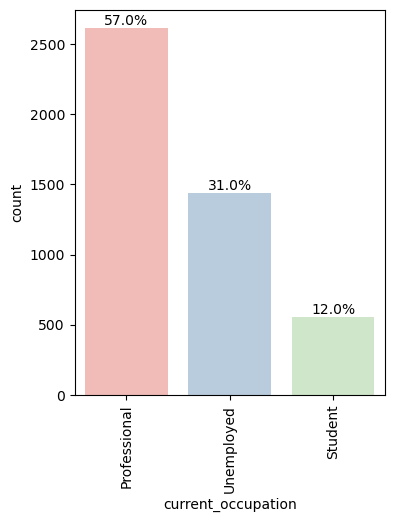

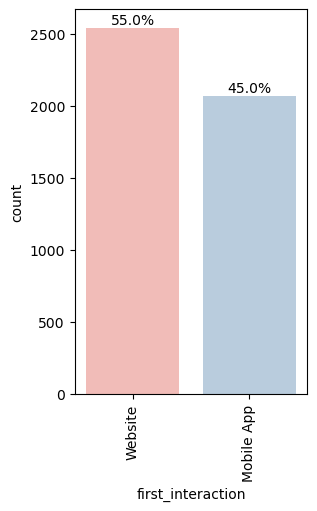

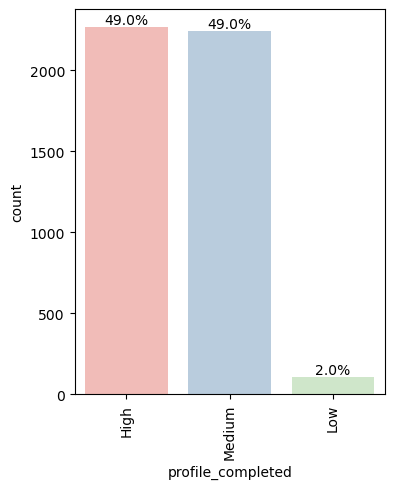

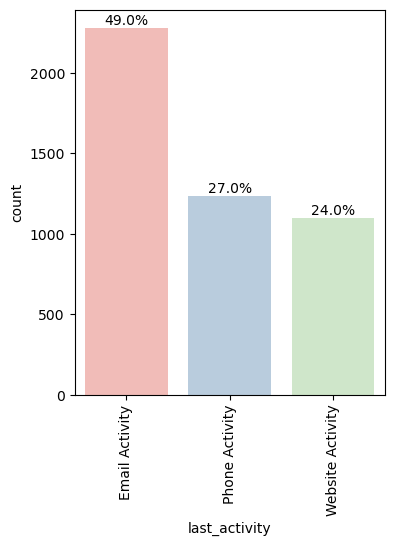

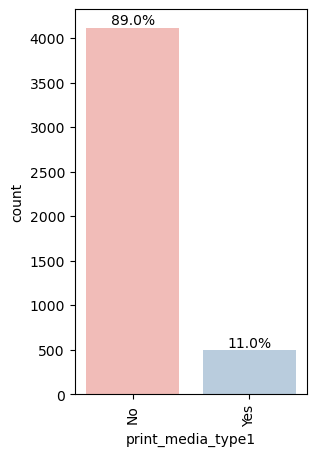

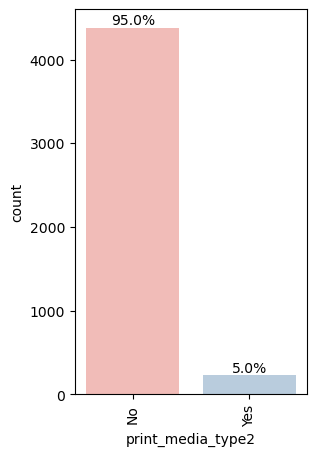

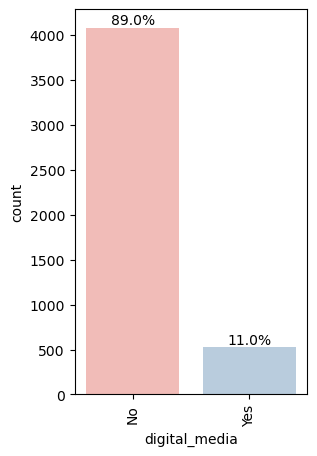

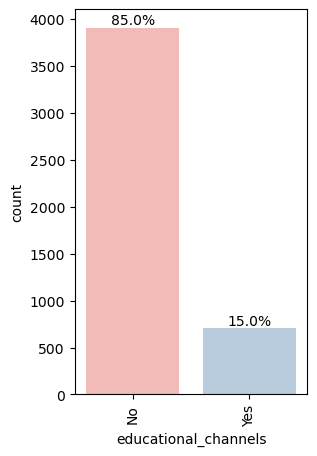

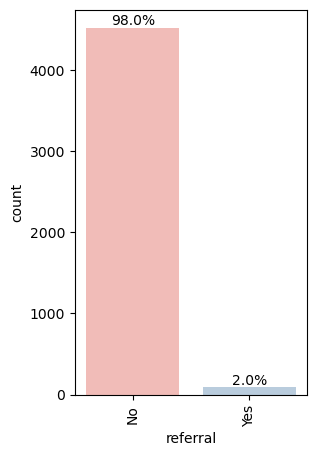

In [16]:
for col in cat_features: 
    count_plot(learn_df, col)

- **current_occupation** of leads:  
    1. 57% professionals
    2. 31% unemployed 
    3. 12% are students
    
- **First Interaction** of leads:
    1. 55% through Website
    2. 45% through Mobile App

- **Profile_compelete** of leads:
    1. 49% high 
    2. 49% medium 
    3. 2% low 

- **last_activity** of leads: 
    1. 49% Email Activity    
    2. 27% Phone Activity     
    3. 24% Website Activity   

- Seen ads in **Newspaper (print_mdeia_type1)**:
    1. 89% No  
    2. 11% Yes

- Seen ads in **Magazine (print_mdeia_type2)**:
    1. 95% No  
    2. 5% Yes

- Seen ads on **digital_medoa**:
    1. 89% No  
    2. 11% Yes

- Seen ads in **educational channels**:
    1. 85% No  
    2. 15% Yes

- **refarral**:
    1. 98% No  
    2. 2% Yes

#### **Multivariate Anylsis**

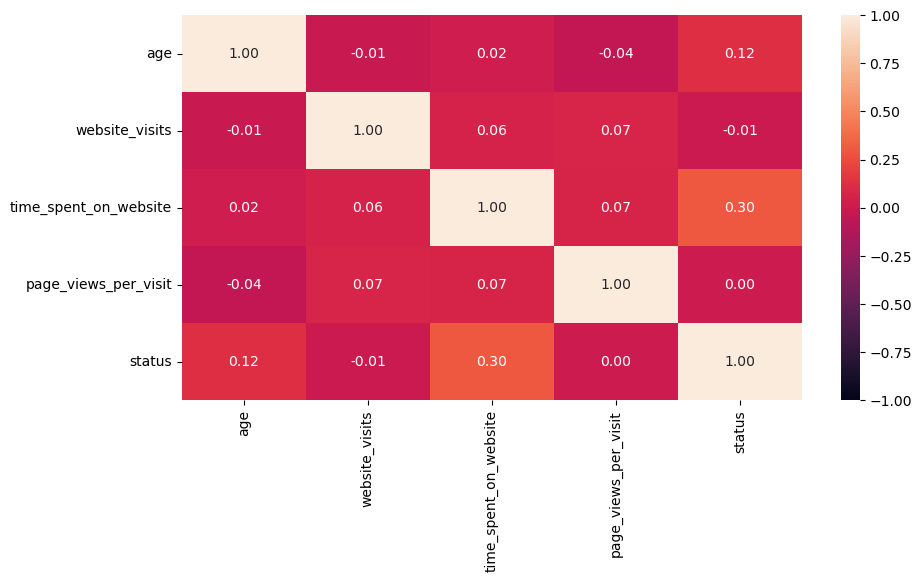

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(data=learn_df[num_features].corr(),  annot=True, fmt='.2f', vmin=-1, vmax=1. )
plt.show()

- A positive correlation exists between age and time spent on a website and status. 
- Page views per visit and website visit don't correlate with status. 

#### **Bivariate Analysis**

##### **Categorical Features VS Target**

In [18]:
def bar_plot(data, x, y): 
    table = pd.crosstab(data[x], data[y], normalize='index').sort_values(by=data[y].value_counts().index[-1], ascending=False)
    print(table)
    table.plot(kind='bar', stacked=True, figsize= (data[x].nunique()+ 3, 5))
    plt.ylabel(y)
    plt.xlabel(x)
    plt.legend(frameon=False, bbox_to_anchor=(1,1))
    plt.show()


status                     0         1
current_occupation                    
Professional        0.644878  0.355122
Unemployed          0.734212  0.265788
Student             0.882883  0.117117


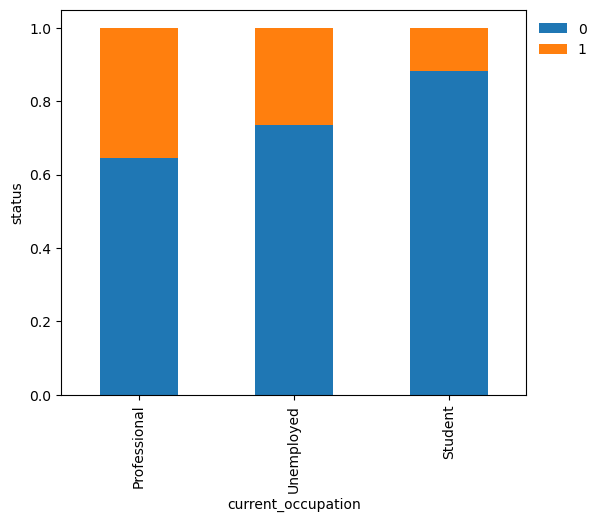

----------------------------------------------------------------------------------------------------
status                    0         1
first_interaction                    
Website            0.544060  0.455940
Mobile App         0.894686  0.105314


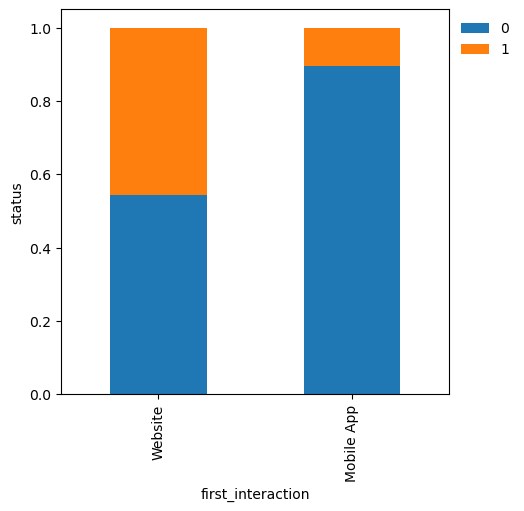

----------------------------------------------------------------------------------------------------
status                    0         1
profile_completed                    
High               0.582155  0.417845
Medium             0.811245  0.188755
Low                0.925234  0.074766


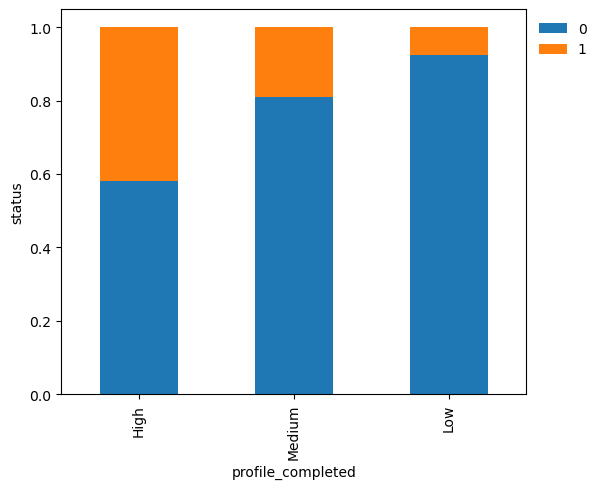

----------------------------------------------------------------------------------------------------
status                   0         1
last_activity                       
Website Activity  0.615455  0.384545
Email Activity    0.696664  0.303336
Phone Activity    0.786872  0.213128


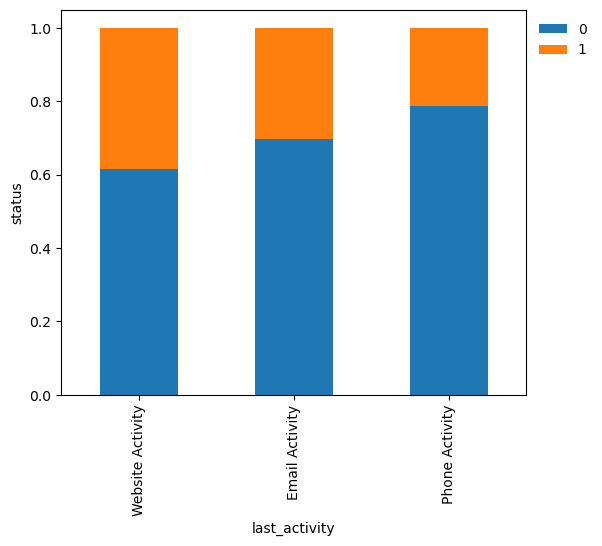

----------------------------------------------------------------------------------------------------
status                   0        1
print_media_type1                  
Yes                0.68008  0.31992
No                 0.70401  0.29599


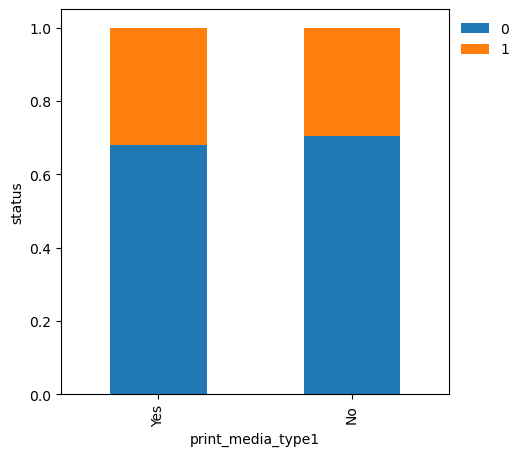

----------------------------------------------------------------------------------------------------
status                    0         1
print_media_type2                    
Yes                0.678112  0.321888
No                 0.702672  0.297328


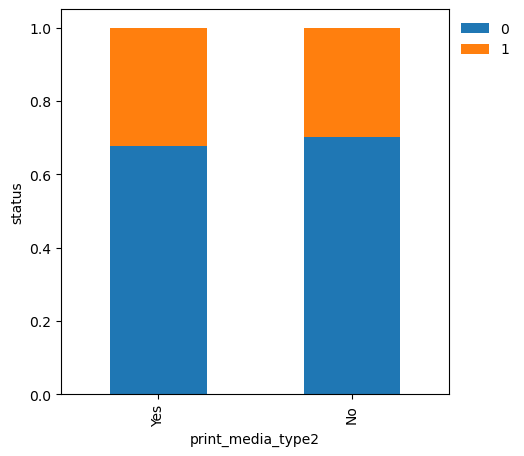

----------------------------------------------------------------------------------------------------
status                0         1
digital_media                    
Yes            0.681214  0.318786
No             0.704039  0.295961


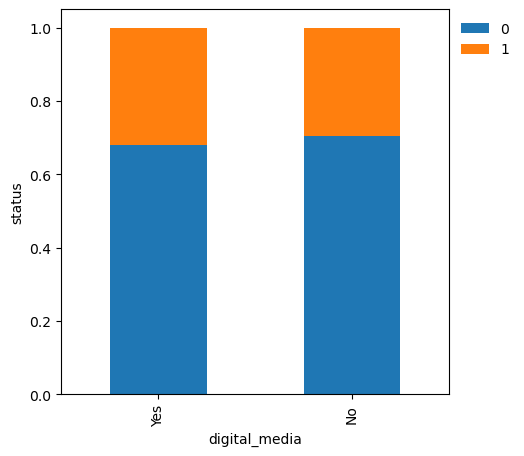

----------------------------------------------------------------------------------------------------
status                       0         1
educational_channels                    
No                    0.697978  0.302022
Yes                   0.720567  0.279433


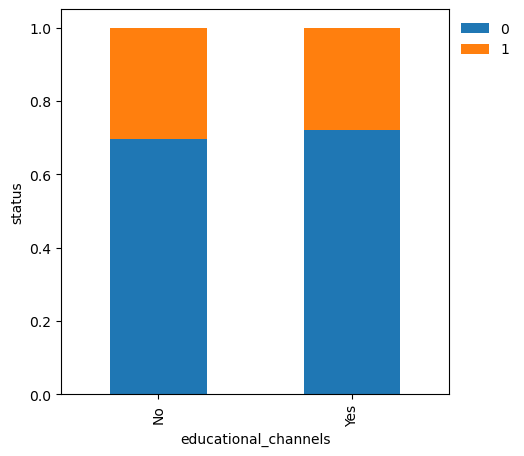

----------------------------------------------------------------------------------------------------
status           0         1
referral                    
Yes       0.322581  0.677419
No        0.709228  0.290772


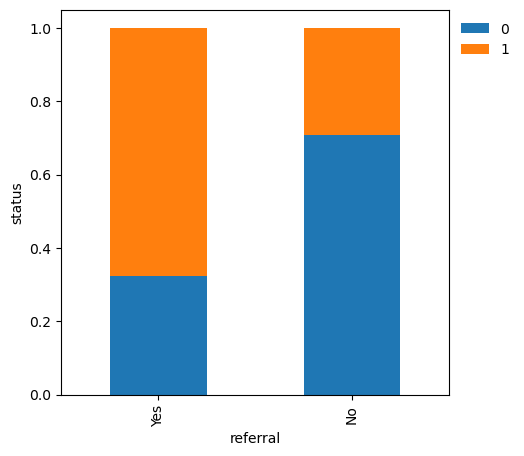

----------------------------------------------------------------------------------------------------


In [19]:
for col in cat_features: 
    bar_plot(learn_df, col, 'status')
    print('--'*50)

Covertion rates: 
- **current_occupation**:
    1. Professional 35%
    2. unemployed 27% 
    3. students  11% 
    - **There is a higher chance for professionals to switch to the paid version of the tool.** 

- **First Interaction**:
    1. Website 46%
    2. Mobile App 10%
    - **Leads whose first interaction was through the website have overwhelmingly higher conversion rates. Suggesting that the company might have a better Website than a mobile app.** 

- **Profile_compelete**:
    1. High 42%
    2. Medium 19%
    3. Low 7%
    - **Leads that completed their profiles have a higher conversion rate of 42% compared to 19% for medium-level completion and 7% for low-profile completion.**

- **last_activity**: 
    1. Email Activity 30%  
    2. Phone Activity 21% 
    3. Website Activity 38% 
    - **Leads with the last activity of website and emails have a higher conversion rate, with website being the highest at 38%** 
    
- Seen ad in **Newspaper (print_mdeia_type1)**:
    1. No 30%
    2. Yes 32%
    - **Whether leads see the ad in the newspaper or not doesn't seem to impact the conversation rate that much.** 

- Seen ad in **Magazine (print_mdeia_type2)**:
    1. No 30%
    2. Yes 32%
    - **Whether leads see the ad in the magazine or not doesn't seem to impact the conversation rate that much that much.** 

- Seen ad on **digital_media**:
    1. No 30%
    2. Yes 32%
    - **Whether leads see the ad on digital media or not doesn't seem to impact the conversation rate that much that much.** 

- Seen ad in **educational channels**:
    1. No 30%
    2. Yes 28%
    - **Whether leads see the ad on the education channels or not doesn't seem to impact the conversation rate that much that much.** 

- **refarral**:
    1. No 29%
    2. Yes 68%
    - **Leads that had referral have an overwhelmingly higher conversion rate of 68% compared to 29% with no referral.**

##### **Numerical Features vs Target**

In [20]:
def dist_box_plot(data, predictor, target):
    f, (ax_hist, ax_box) = plt.subplots(nrows =1, ncols=2, figsize=(10,4))

    sns.boxplot(data=data, x=target, y=predictor, ax=ax_box, color = 'lightgreen')
    for i in range(learn_df[target].nunique()):
        df_status = data[data[target] == data[target].unique()[i]]
        sns.histplot(data=df_status, x=predictor, kde=True, ax=ax_hist, label = f'{target} {i}')
        ax_hist.legend()

    plt.show()

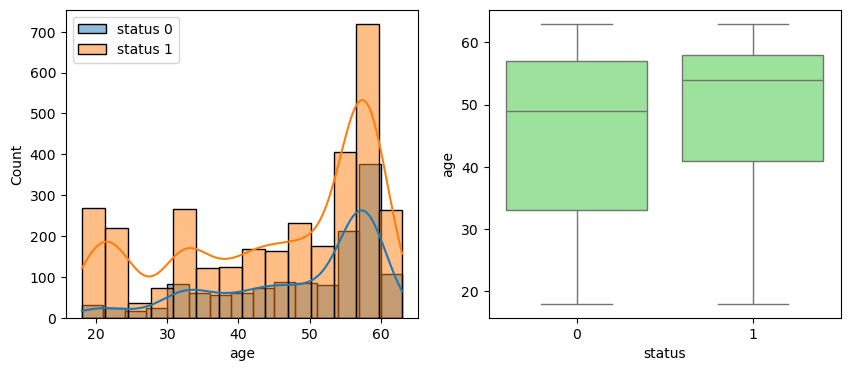

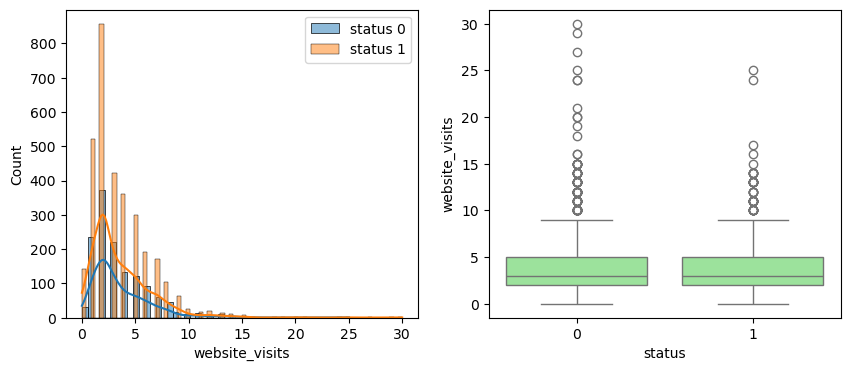

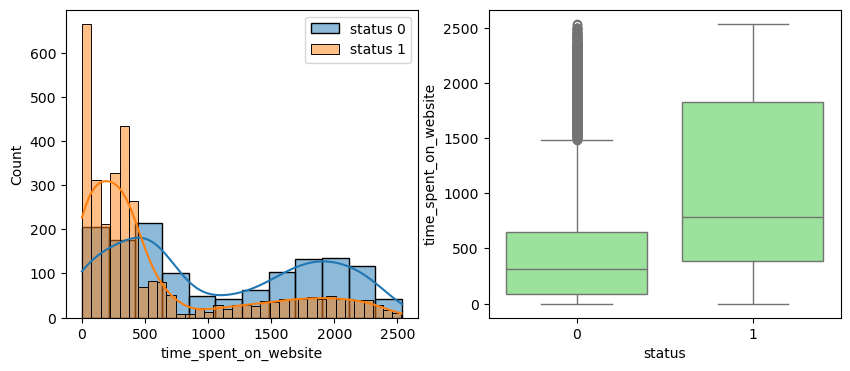

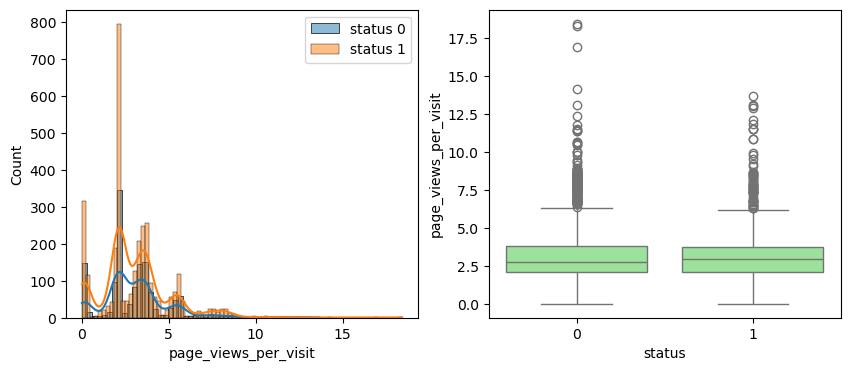

In [21]:
for col in num_features[:-1]:
    dist_box_plot(learn_df, col, 'status')

- On average, leads that spend more time on the website have a higher conversion rate, with a median of ~790 for leads that paid vs. ~320 for the leads that didn't pay.
- The number of page views per visit doesn't affect the conversion rate. 
- The number of website visits doesn't affect the conversion rate. 
- On average, leads with higher age have a higher conversion rate.

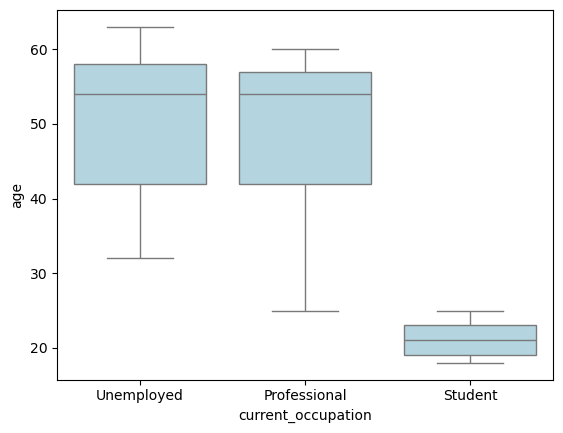

In [22]:
sns.boxplot(data = learn_df, x = "current_occupation", y = "age", color= 'lightblue')
plt.show()

We saw before that professionals have higher conversion rates than the unemployed. As seen here, these two groups are older than students. That's aligned with the point above: older people have a higher conversion rate.

#### **Check Outliers**

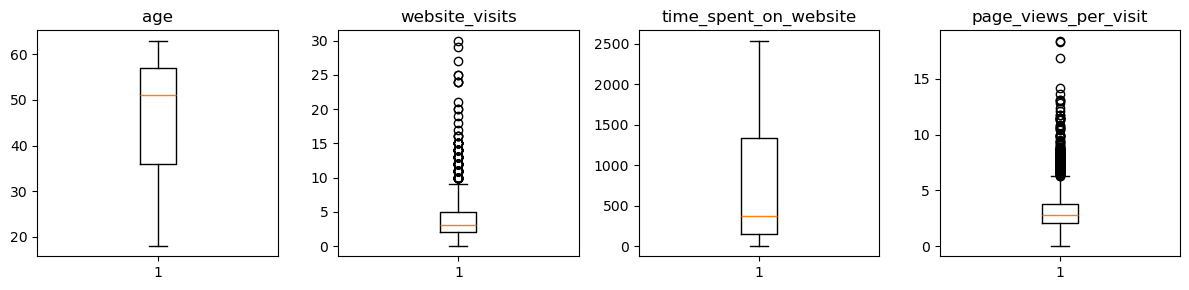

In [24]:
num_features.remove('status')
plt.figure(figsize=(12,3))
for i, variable in enumerate(num_features):
    plt.subplot(1 ,4, i+1)
    plt.boxplot(data = learn_df, x=variable)
    plt.tight_layout()
    plt.title(variable)

plt.show()


-  As noticed before, website visits and page views per visit have many outliers. This indicates that there are individual leads who visit websites more often and look at several pages each visit. 
- Interestingly, the time spent on the website doesn't have an outlier. This shows that those outliers who view more pages per visit don't necessarily read all of those pages but mostly browse and click on them. 

## **Data Preprocessing**

In [25]:
X = learn_df.drop(['status'], axis=1)
Y = learn_df['status']

X = pd.get_dummies(X, drop_first=True)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
print(f'Training Set size: {x_train.shape}')
print(f'Test Set size: {x_test.shape}')
print('--'*30)
print(f'Precentage of classes in the training data:')
print(y_train.value_counts(normalize=True))
print('--'*30)
print(f'Precentage of classes in the test data:')
print(y_train.value_counts(normalize=True))


Training Set size: (3228, 16)
Test Set size: (1384, 16)
------------------------------------------------------------
Precentage of classes in the training data:
0    0.701363
1    0.298637
Name: status, dtype: float64
------------------------------------------------------------
Precentage of classes in the test data:
0    0.701363
1    0.298637
Name: status, dtype: float64


- The data's original distribution of class 0 and 1 was 70% and 30%, respectively. 
- The training and test sets have the same ratio, indicating that none are biased in one direction. 
- We don't need to scale the data for decision tree and random forest modeling, so we didn't use any scaler here. 

## **Building Models**

#### **Model Performance**

In [27]:
def performance_metric(model, predictor, target):
    prediction = model.predict(predictor)
    print(classification_report(target, prediction))
    print('--'*40)
    cm = confusion_matrix(target, prediction)
    sns.heatmap(cm, annot = True, fmt= '.2f' ,xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'] )
    plt.ylabel('Actual')
    plt.xlabel('Predicated')
    plt.show()

- **False positive:** when the model predicted that the lead is converted to a paid customer while, in reality, the lead wasn't converted to a paid customer. In this case, the company loses resources.

- **False negative:** When the model predicted that the lead isn't converted to a paid customer, but in reality, the lead was converted to a paid customer. In this case, the company might lose a potential customer. 

- Since losing customers is more critical than recourses, we want to **minimize the false negative cases**.
- Recall is a good metric for false negatives. We would like to **maximize recall** to **reduce the number of false negative cases**. 

#### **Decision Tree Model**

In [28]:
dtree_model = DecisionTreeClassifier(class_weight={0:0.7, 1:0.3}, random_state=1)
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

Decision Tree perforamnce on training set:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

--------------------------------------------------------------------------------


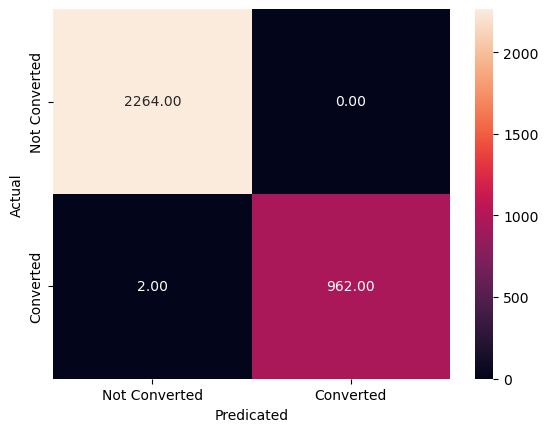

In [29]:
print('Decision Tree perforamnce on training set:')
print('--'*40)
dtree_pref = performance_metric(dtree_model, x_train, y_train)
dtree_pref

Decision Tree perforamnce on test set 
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       971
           1       0.65      0.68      0.67       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384

--------------------------------------------------------------------------------


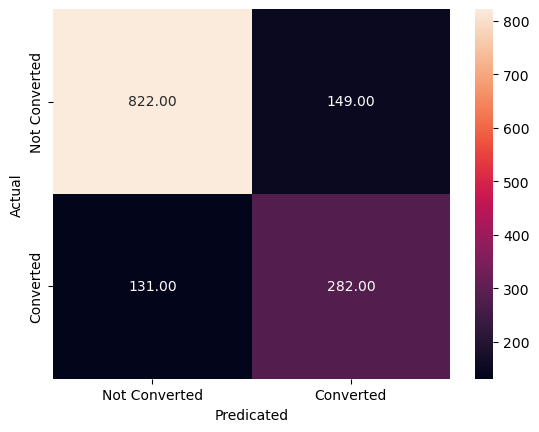

In [30]:
print('Decision Tree perforamnce on test set ')
print('--'*40)
dtree_pref_test = performance_metric(dtree_model, x_test, y_test)
dtree_pref_test

- The performance of the decision tree on the training set is excellent, with recall 1.0 for the training set. 
- The model's performance drops significantly compared to the test model, with a recall score of 0.68, indicating overfitting the data. 
- The performance of the decision tree can be improved by doing hyperparameter tuning.
- One parameter to tune is the maximum depth of the tree (pruning) to avoid overfitting the model and improve its generalization acceptability. 

#### **Random Forest Model**

In [31]:
rf_model = RandomForestClassifier(class_weight={0:0.17, 1:0.83} , random_state=1)
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

Random Forest perforamnce on training set:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

--------------------------------------------------------------------------------


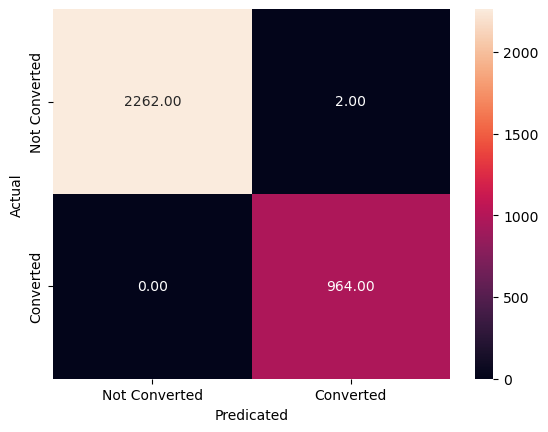

In [32]:
print('Random Forest perforamnce on training set:')
print('--'*40)
rf_pref = performance_metric(rf_model, x_train, y_train)
rf_pref

Random Forest perforamnce on test set 
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.79      0.70      0.74       413

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.86      0.85      1384

--------------------------------------------------------------------------------


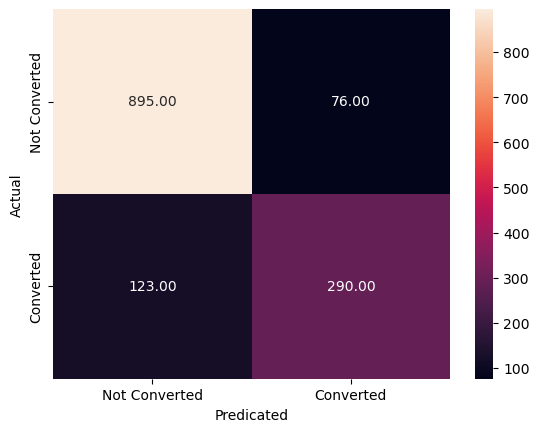

In [33]:
print('Random Forest perforamnce on test set ')
print('--'*40)
rf_pref_test = performance_metric(rf_model, x_test, y_test)
rf_pref_test

- The performance of the random forest on the training set is very good with recall 1.0. 
- The model's performance drops significantly on the test data with a recall score of 0.7, which indicates overfitting the data. 
- The performance of random forest can be improved by doing hyperparameter tuning.
- In the next section, we will perform hyperparameter tuning to see if we can improve the performance of random forests and decision trees. 

## **Hyperparameter Tuning**

#### **Decision Tree Tuning**

In [48]:
dtree_model_tuned = DecisionTreeClassifier(class_weight={0:0.7, 1:0.3}, random_state=1)

dtree_parameters = {'criterion': ['gini', 'entropy'],
                    'max_depth': list(np.arange(2,10)),
                    'min_samples_leaf': [5,10, 15, 20, 25],
                      }

score= make_scorer(recall_score, pos_label= 1)

dtree_grid_screach = GridSearchCV(dtree_model_tuned, dtree_parameters, scoring=score, cv=5)
dtree_grid_screach.fit(x_train, y_train)
dtree_tuned = dtree_grid_screach.best_estimator_
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, criterion='entropy',
                       max_depth=9, min_samples_leaf=25, random_state=1)

Tuned Decision Tree perforamnce on training set:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2264
           1       0.90      0.54      0.68       964

    accuracy                           0.85      3228
   macro avg       0.87      0.76      0.79      3228
weighted avg       0.85      0.85      0.83      3228

--------------------------------------------------------------------------------


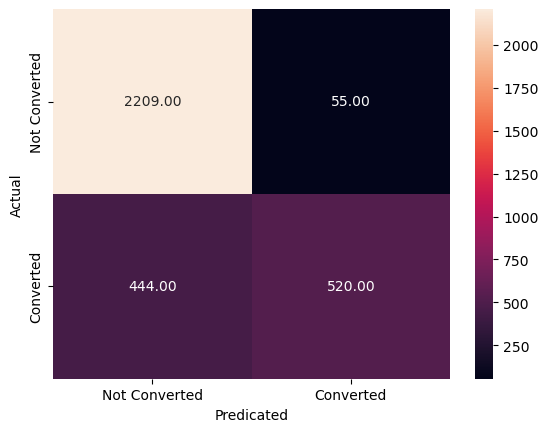

In [49]:
print('Tuned Decision Tree perforamnce on training set:')
print('--'*40)
dtree_pref_tuned = performance_metric(dtree_tuned, x_train, y_train)
dtree_pref_tuned

Tuned Decision Tree perforamnce on test set 
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.88       971
           1       0.86      0.49      0.62       413

    accuracy                           0.82      1384
   macro avg       0.84      0.73      0.75      1384
weighted avg       0.83      0.82      0.81      1384

--------------------------------------------------------------------------------


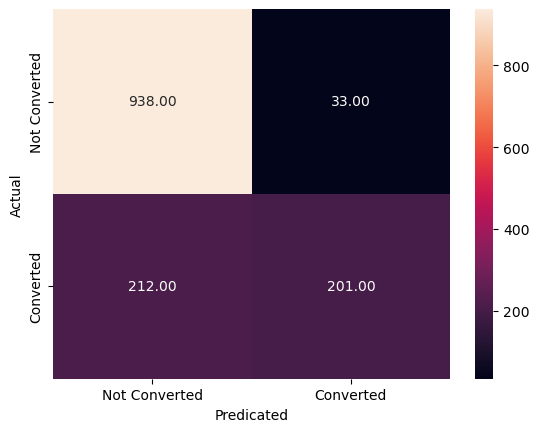

In [50]:
print('Tuned Decision Tree perforamnce on test set ')
print('--'*40)
dtree_pref_tuned_test = performance_metric(dtree_tuned, x_test, y_test)
dtree_pref_tuned_test

- The recall of the tuned decision tree on the training set is 0.54. 
- The model's performance drops on the test model with a recall score of 0.49. 
- The model is not overfitting anymore but is not performing well. Flipping a coin with a 50% chance is better than the test results. So, overall, we are not happy with the decision tree's performance.

##### **Visualization of Tuned Decision Tree**

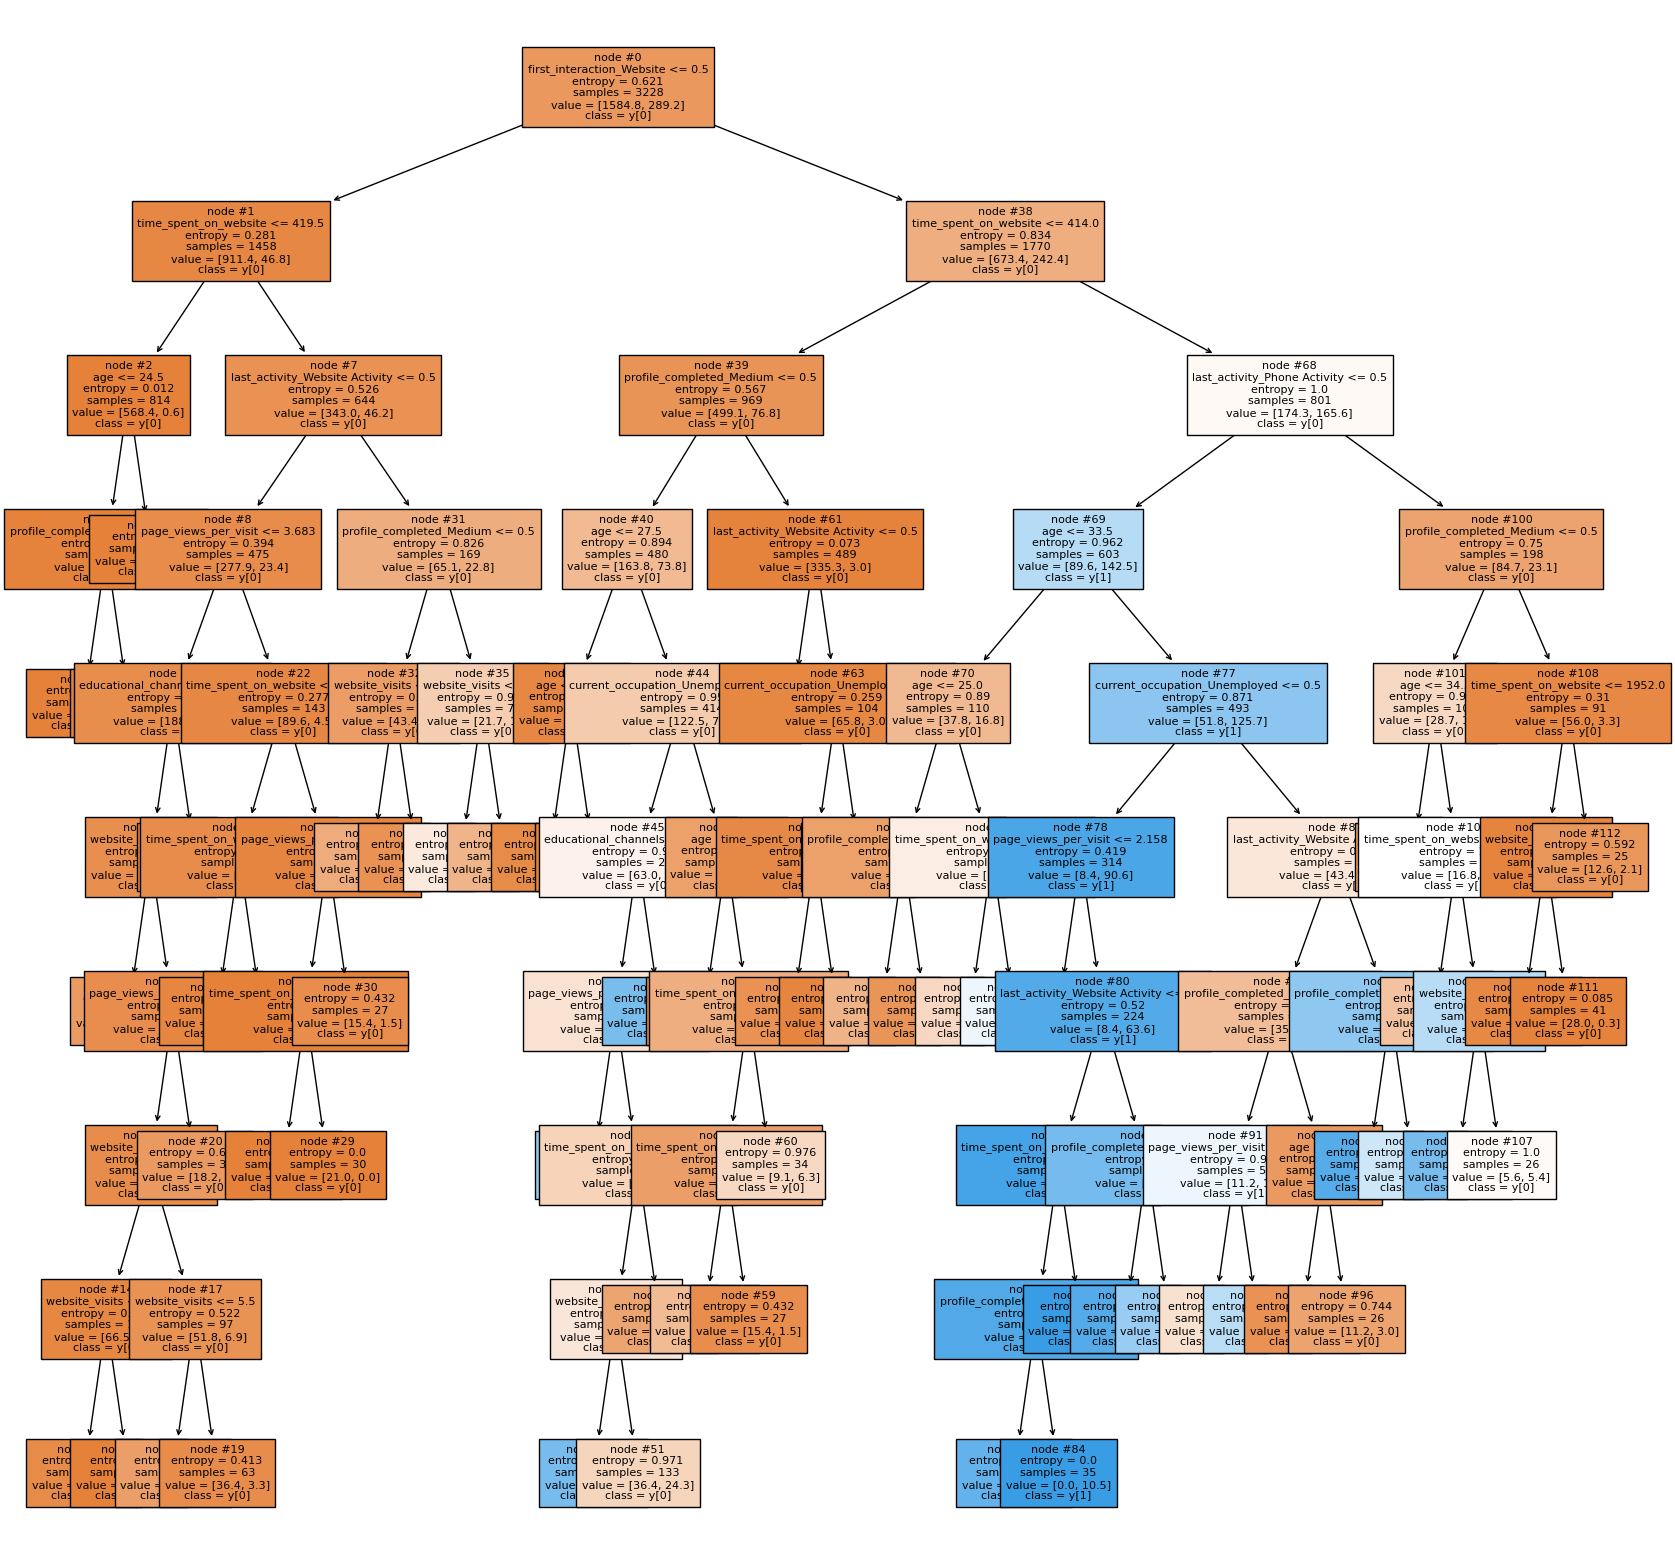

In [53]:
features = x_train.columns.to_list()
plt.figure(figsize=(20,20))
tree.plot_tree(dtree_tuned, feature_names= features,
               filled= True, fontsize=8, node_ids=True, class_names= True)
plt.show()

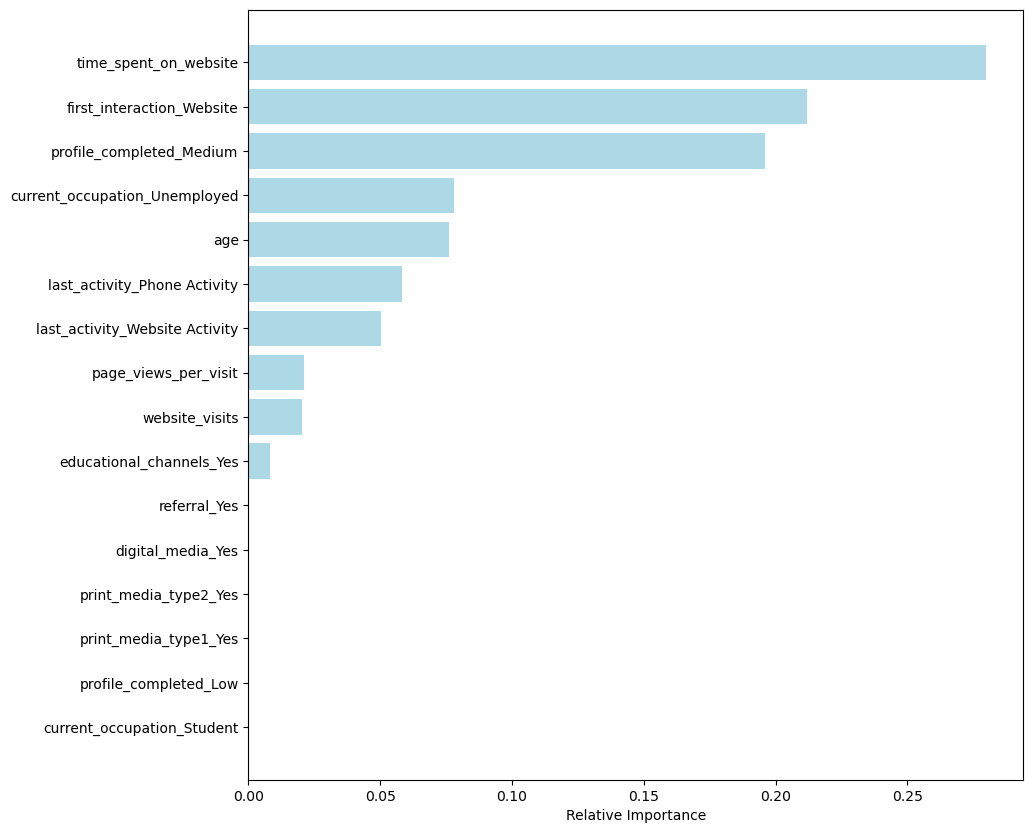

In [56]:
importance_dt =dtree_tuned.feature_importances_

indices = np.argsort(importance_dt)
plt.figure(figsize = (10, 10))
plt.barh(range(len(indices)), importance_dt[indices], color = 'lightblue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The features with the highest to lowest information gains are: 
    1. time_spent_on_website
    2. first_intereaction
    3. profile_completed
    4. current_occupation
    5. age 
    6. last_activity
    7. page_views_per_visit
    8. website_visits
    9. education_channels

- These features had no impact on the model: 
    1. referral
    2. digital_media
    3. print_media_type2
    4. print_media_type1

#### **Random Forest Tuning**

In [59]:
rf_model_tuned = RandomForestClassifier(criterion= 'entropy', random_state=1)

rf_parameters = {'n_estimators': [110, 120, 130],
                    'max_depth': list(np.arange(5,9)),
                    'min_samples_leaf': [20, 25],
                     'max_features': [ 0.8, 0.9],
                     'max_samples':[0.9, 1],
                     'class_weight':[ {0:0.7, 1:0.3}, 'balanced']
                      }

score= make_scorer(recall_score, pos_label= 1)

rf_grid_screach = GridSearchCV(rf_model_tuned, rf_parameters, scoring=score, cv=5)
rf_grid_screach.fit(x_train, y_train)
rf_tuned = rf_grid_screach.best_estimator_
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=1)

Tuned Decision Tree perforamnce on training set:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.67      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228

--------------------------------------------------------------------------------


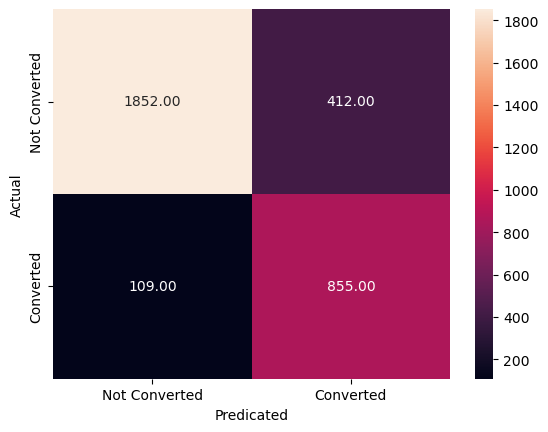

In [60]:
print('Tuned Decision Tree perforamnce on training set:')
print('--'*40)
rf_pref_tuned = performance_metric(rf_tuned, x_train, y_train)
rf_pref_tuned

Tuned Decision Tree perforamnce on test set 
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.82      1384

--------------------------------------------------------------------------------


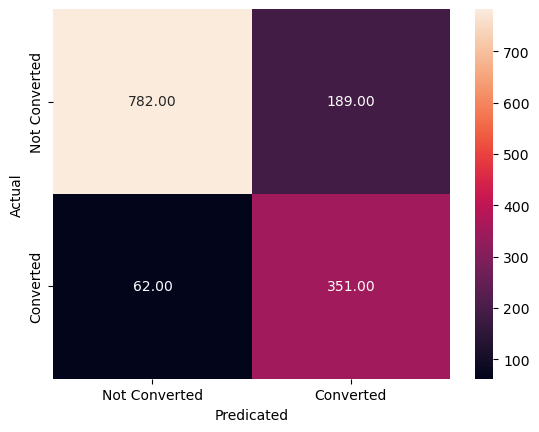

In [61]:
print('Tuned Decision Tree perforamnce on test set ')
print('--'*40)
rf_pref_tuned_test = performance_metric(rf_tuned, x_test, y_test)
rf_pref_tuned_test

- The recall of the tuned random forest on the training set is 0.89. 
- The model's performance slightly drops on the test model with a recall score of 0.85. 
- The random forest performance is good on the training and test data. 
- We will pick **Tuned Random Foreest** as a final model. 

##### **Visulization of Tuned Random Forest**

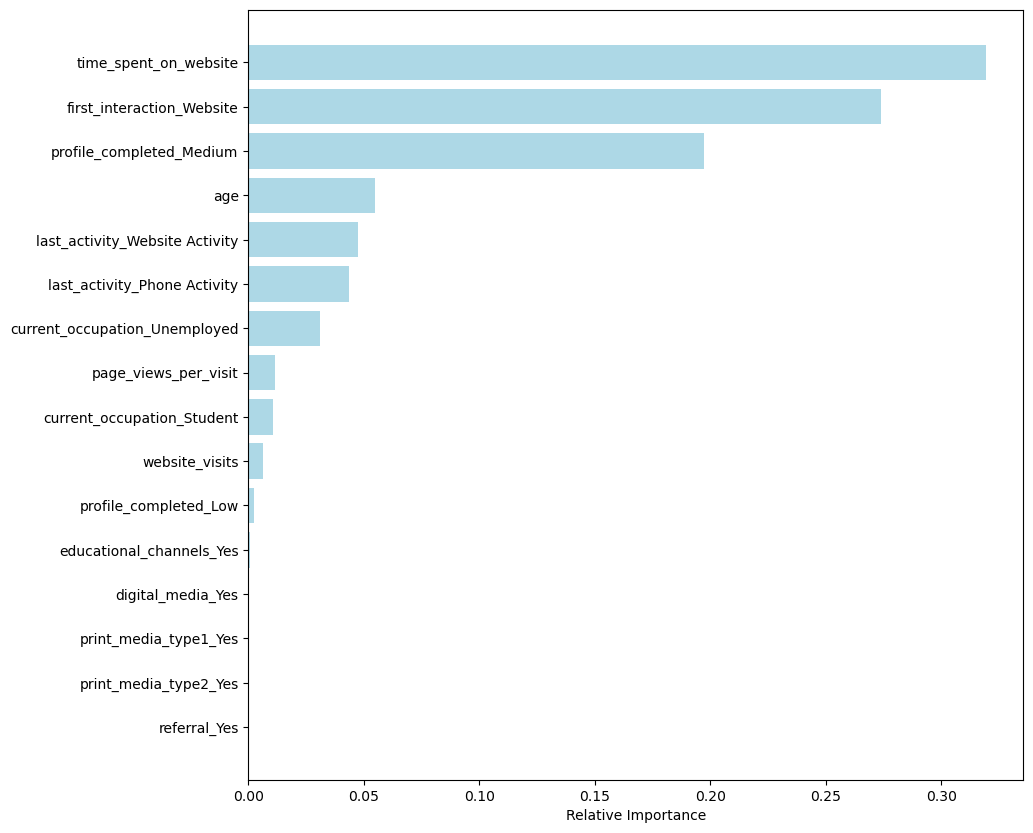

In [62]:
importance_rf =rf_tuned.feature_importances_

indices = np.argsort(importance_rf)
plt.figure(figsize = (10, 10))
plt.barh(range(len(indices)), importance_rf[indices], color = 'lightblue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The features with the highest to lowest information gains are: 
    1. time_spent_on_website
    2. first_intereaction
    3. profile_completed
    4. age 
    5. last_activity
    6. current_occupation
    7. page_views_per_visit
    8. website_visits

- These features had no impact on the model: 
    1. referral
    2. digital_media
    3. print_media_type2
    4. print_media_type1
    5. education_channels

## **Actionable Insights and Recommendations**

- **Tuned Random Forest** performing well on training and test data; we will use this model for future prediction.
- The model accuracy is 0.82, and recall is 0.85. 
- The most important feature in defining the conversion to paid membership is the time spent on the website. 

<br>

- First interaction with the website is the second most important feature. Before the data analysis part, we show that leads that first interaction with ExtraaLearn through the website has a higher conversion rate, which might suggest that the UI of the website is much better than the Mobile App. We might want to spend resources here to improve the UI since it can affect the conversion rate. Also, we need to spend resources to maintain and further improve the website. 

- Data suggests that users who complete their profiles have a higher chance of getting a paid version of the tool. The company can think of incentives to motivate users to make a profile. However, the causation or correlation is unclear yet, so the impact might not be high if we trick the users into making profiles. 

- The last activity on the website and phone results in a high conversion rate compared to the Email. This might suggest that the customer support team does a better job on online chat and phone than on Email. The company might want to invest in this area to find the cause of the low conversation rate on the phone and improve it. It can look at their service through chat to find good patterns of support.

- It seems that ads in newspapers, magazines, digital platforms, education channels, and referrals don't affect the conversion rate. The company might want to stop investing in those areas or do a customer research study to understand features that attract customers with higher conversion rates through these ads. 

- Professionals have the highest conversion rate, so the company might look into ways to target these customers and increase its reach to this group through ads. 
